In [1]:
from sympy import *
from sympy.solvers.solveset import linsolve
init_printing()
import numpy as np
t, T, epsilon = symbols('t T epsilon')

def Fun_t(f):
    return Function(f)(t)

def Fun_T(f):
    return Function(f)(T)

# Inner expansion

In [2]:
iR20,  iR21, iR22, iQ20, iQ21, iQ22 = map(Fun_T,['\\tilde{R}_2^{(0)}', '\\tilde{R}_2^{(1)}', '\\tilde{R}_2^{(2)}', '\\tilde{Q}_2^{(0)}', '\\tilde{Q}_2^{(1)}', '\\tilde{Q}_2^{(2)}'])
iR2 = iR20 + epsilon*iR21 + epsilon**2*iR22 +Order(epsilon**3)
iQ2 = iQ20 + epsilon*iQ21 + epsilon**2*iQ22 +Order(epsilon**3)

iR30,  iR31, iR32, iQ40, iQ41, iQ42 = map(Fun_T,['\\tilde{R}_3^{(0)}', '\\tilde{R}_3^{(1)}', '\\tilde{R}_3^{(2)}', '\\tilde{Q}_4^{(0)}', '\\tilde{Q}_4^{(1)}', '\\tilde{Q}_4^{(2)}'])
iR3 = iR30 + epsilon*iR31 + epsilon**2*iR32 +Order(epsilon**3)
iQ4 = iQ40 + epsilon*iQ41 + epsilon**2*iQ42 +Order(epsilon**3)


# actually the rate constants are slowly varying relative to Q on this time scale (should be constants)
iq1p, iq1m, iq20p, iq20m, iq3p, iq3m, iq40p, iq40m, iq5p, iq5m =  map(Fun_T,['q_1^+', 'q_1^-', 'q_{20}^+', 'q_{20}^-', 'q_3^+', 'q_3^-', 'q_{40}^+', 'q_{40}^-', 'q_5^+', 'q_5^-'])





## Inner ODEs

Consider the initial value problem for $t-t_0 \leq \mathcal{O}(\varepsilon)$. Let $T=(t-t_0)/\varepsilon = \mathcal{O}(1)$.

\begin{align}
        \frac{d \widetilde{R}_2}{d T} & = \varepsilon\left(q_1^+(1-\widetilde{R}_2-\widetilde{R}_3) + q_3^- \widetilde{Q}_4 + (q_3^+ - q_1^-)\widetilde{Q}_2 - q_3^+ \widetilde{R}_2\right) \label{eq:diR2dT} \\
        \frac{d \widetilde{R}_3}{d T} & = \varepsilon\left(q_3^+(\widetilde{R}_2-\widetilde{Q}_2) + q_5^- (1-\widetilde{R}_2-\widetilde{R}_3)  -q_5^+ \widetilde{R}_3 + (q_5^+- q_3^-) \widetilde{Q}_4\right) \label{eq:diR4dT} \\
        \frac{d \widetilde{Q}_2}{d T} &= q_{20}^- (\widetilde{R}_2-\widetilde{Q}_2) - q_{20}^+Q_2 + \varepsilon\left(q_1^+ (1-\widetilde{R}_2-\widetilde{R}_3) - q_1^- \widetilde{Q}_2\right) \label{eq:diQ2dT}\\
        \frac{d \widetilde{Q}_4}{d T} &= -q_{40}^+ \widetilde{Q}_4 + q_{40}^- (\widetilde{R}_3-\widetilde{Q}_4) + \varepsilon \left(q_3^+ (\widetilde{R}_2-\widetilde{Q}_2) - q_3^- \widetilde{Q}_4\right).  
    \label{eq:diQ4dT}
    \end{align}

In [3]:
diR2_dT = iR2.diff(T)
diR2dT_expr = -diR2_dT + epsilon*(iq1p *(1-iR2-iR3) + iq3m*iQ4 + (iq3p-iq1m)*iQ2 - iq3p*iR2)
diR3_dT = iR3.diff(T)
diR3dT_expr = -diR3_dT + epsilon*(iq3p*(iR2-iQ2) + iq5m*(1-iR2-iR3)-iq5p*iR3 + (iq5p-iq3m)*iQ4)
diQ2_dT = iQ2.diff(T)
diQ2_dT_expr = -diQ2_dT + iq20m*(iR2-iQ2)-iq20p*iQ2 + epsilon*(iq1m*(1-iR2-iR3)-iq1m*iQ2)
diQ4_dT = iQ4.diff(T)
diQ4_dT_expr = -diQ4_dT + -iq40p*iQ4 + iq40m*(iR3-iQ4) + epsilon*(iq3p*(iR2-iQ2)-iq3m*iQ4)

diR2_dT_by_order = diR2dT_expr.expand().collect(epsilon,evaluate=False)
diR3_dT_by_order = diR3dT_expr.expand().collect(epsilon,evaluate=False)
diQ2_dT_by_order = diQ2_dT_expr.expand().collect(epsilon,evaluate=False)
diQ4_dT_by_order = diQ4_dT_expr.expand().collect(epsilon,evaluate=False)




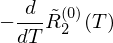

In [4]:
diR2_dT_by_order[1].removeO()

In [5]:
dsolve(diR2_dT_by_order[1].removeO(),iR20)
C1 = symbols("C_1")

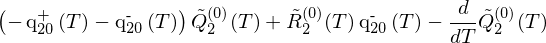

In [6]:
diQ2_dT_by_order[1].removeO().collect([iQ20])

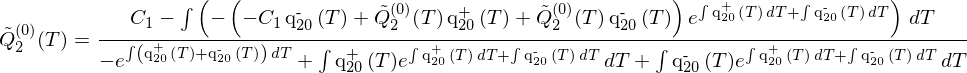

In [7]:
simplify(dsolve(diQ2_dT_by_order[1].removeO().subs(iR20,C1).collect([iQ20]),iQ20))

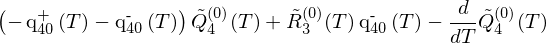

In [8]:
diQ4_dT_by_order[1].removeO().collect([iQ40])

In [9]:
R20_solution = symbols("R_2^{(0)}(t_0)")
R30_solution = symbols("R_3^{(0)}(t_0)")
Q20_solution = (iq20m/(iq20m+iq20p)).subs(T,0)*R20_solution
Q40_solution = (iq40m/(iq40m+iq40p)).subs(T,0)*R30_solution


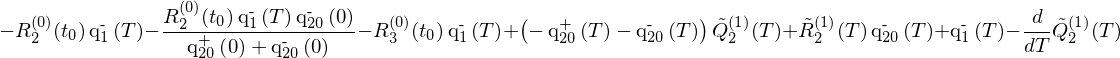

In [10]:
diQ2_dT_by_order[epsilon].subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([iQ21,iR20])

In [11]:
print_latex(diQ2_dT_by_order[epsilon].subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([iQ21,iR20]))

- R_2^{(0)}(t_0) \operatorname{q^{-}_{1}}{\left (T \right )} - \frac{R_2^{(0)}(t_0) \operatorname{q^{-}_{1}}{\left (T \right )} \operatorname{q_{20}^-}{\left (0 \right )}}{\operatorname{q_{20}^+}{\left (0 \right )} + \operatorname{q_{20}^-}{\left (0 \right )}} - R_3^{(0)}(t_0) \operatorname{q^{-}_{1}}{\left (T \right )} + \left(- \operatorname{q_{20}^+}{\left (T \right )} - \operatorname{q_{20}^-}{\left (T \right )}\right) \tilde{Q}_2^{(1)}{\left (T \right )} + \tilde{R}_2^{(1)}{\left (T \right )} \operatorname{q_{20}^-}{\left (T \right )} + \operatorname{q^{-}_{1}}{\left (T \right )} - \frac{d}{d T} \tilde{Q}_2^{(1)}{\left (T \right )}


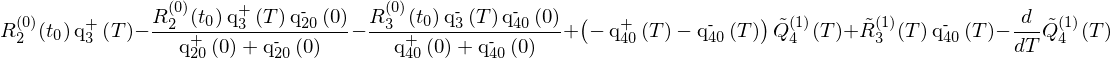

In [12]:
diQ4_dT_by_order[epsilon].subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([iQ41,Q20_solution,Q40_solution,R20_solution,R30_solution])

In [13]:
print_latex(diQ4_dT_by_order[epsilon].subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([iQ21,iR20]))

R_2^{(0)}(t_0) \operatorname{q^{+}_{3}}{\left (T \right )} - \frac{R_2^{(0)}(t_0) \operatorname{q^{+}_{3}}{\left (T \right )} \operatorname{q_{20}^-}{\left (0 \right )}}{\operatorname{q_{20}^+}{\left (0 \right )} + \operatorname{q_{20}^-}{\left (0 \right )}} - \frac{R_3^{(0)}(t_0) \operatorname{q^{-}_{3}}{\left (T \right )} \operatorname{q_{40}^-}{\left (0 \right )}}{\operatorname{q_{40}^+}{\left (0 \right )} + \operatorname{q_{40}^-}{\left (0 \right )}} - \tilde{Q}_4^{(1)}{\left (T \right )} \operatorname{q_{40}^+}{\left (T \right )} - \tilde{Q}_4^{(1)}{\left (T \right )} \operatorname{q_{40}^-}{\left (T \right )} + \tilde{R}_3^{(1)}{\left (T \right )} \operatorname{q_{40}^-}{\left (T \right )} - \frac{d}{d T} \tilde{Q}_4^{(1)}{\left (T \right )}


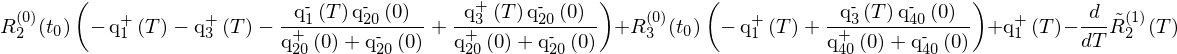

In [14]:
diR2_dT_by_order[epsilon].subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([iQ21,iR20]).collect([R20_solution,R30_solution])

In [15]:
print_latex(diR2_dT_by_order[epsilon].subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([iQ21,iR20]).collect([R20_solution,R30_solution]))

R_2^{(0)}(t_0) \left(- \operatorname{q^{+}_{1}}{\left (T \right )} - \operatorname{q^{+}_{3}}{\left (T \right )} - \frac{\operatorname{q^{-}_{1}}{\left (T \right )} \operatorname{q_{20}^-}{\left (0 \right )}}{\operatorname{q_{20}^+}{\left (0 \right )} + \operatorname{q_{20}^-}{\left (0 \right )}} + \frac{\operatorname{q^{+}_{3}}{\left (T \right )} \operatorname{q_{20}^-}{\left (0 \right )}}{\operatorname{q_{20}^+}{\left (0 \right )} + \operatorname{q_{20}^-}{\left (0 \right )}}\right) + R_3^{(0)}(t_0) \left(- \operatorname{q^{+}_{1}}{\left (T \right )} + \frac{\operatorname{q^{-}_{3}}{\left (T \right )} \operatorname{q_{40}^-}{\left (0 \right )}}{\operatorname{q_{40}^+}{\left (0 \right )} + \operatorname{q_{40}^-}{\left (0 \right )}}\right) + \operatorname{q^{+}_{1}}{\left (T \right )} - \frac{d}{d T} \tilde{R}_2^{(1)}{\left (T \right )}


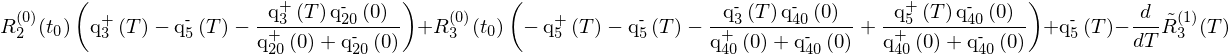

In [16]:
diR3_dT_by_order[epsilon].collect([iQ21,iR20]).subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([R20_solution,R30_solution])

In [17]:
print_latex(diR3_dT_by_order[epsilon].collect([iQ21,iR20]).subs(
    {iQ20:Q20_solution, iQ40: Q40_solution, 
     iR20: R20_solution, iR30: R30_solution
    }).collect([R20_solution,R30_solution]))

R_2^{(0)}(t_0) \left(\operatorname{q^{+}_{3}}{\left (T \right )} - \operatorname{q^{-}_{5}}{\left (T \right )} - \frac{\operatorname{q^{+}_{3}}{\left (T \right )} \operatorname{q_{20}^-}{\left (0 \right )}}{\operatorname{q_{20}^+}{\left (0 \right )} + \operatorname{q_{20}^-}{\left (0 \right )}}\right) + R_3^{(0)}(t_0) \left(- \operatorname{q^{+}_{5}}{\left (T \right )} - \operatorname{q^{-}_{5}}{\left (T \right )} - \frac{\operatorname{q^{-}_{3}}{\left (T \right )} \operatorname{q_{40}^-}{\left (0 \right )}}{\operatorname{q_{40}^+}{\left (0 \right )} + \operatorname{q_{40}^-}{\left (0 \right )}} + \frac{\operatorname{q^{+}_{5}}{\left (T \right )} \operatorname{q_{40}^-}{\left (0 \right )}}{\operatorname{q_{40}^+}{\left (0 \right )} + \operatorname{q_{40}^-}{\left (0 \right )}}\right) + \operatorname{q^{-}_{5}}{\left (T \right )} - \frac{d}{d T} \tilde{R}_3^{(1)}{\left (T \right )}
